In [1]:
%load_ext watermark

import ipywidgets as widgets
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

from ipywidgets import interact, interact_manual


sns.set_style()

SALES_DATA_BY_COUNTRY = 'sales_data_cleaned.csv'

In [2]:
sales_by_country = pd.read_csv(SALES_DATA_BY_COUNTRY)
sales_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   article_id        9465 non-null   int64  
 1   transaction_date  9465 non-null   object 
 2   country           9465 non-null   object 
 3   article_count     9465 non-null   float64
 4   in_stock          9465 non-null   float64
 5   sales_price       9465 non-null   float64
 6   original_price    9465 non-null   float64
 7   discount          9465 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 591.7+ KB


In [3]:
sales_by_country['transaction_date'] = pd.to_datetime(sales_by_country['transaction_date'])

## Add Week of Year and Month

In [4]:
sales_by_country['week'] = sales_by_country['transaction_date'].dt.isocalendar().week
sales_by_country['month'] = sales_by_country['transaction_date'].dt.month
sales_by_country['year'] = sales_by_country['transaction_date'].dt.year

In [5]:
sales_by_country.sample(n=10)

,article_id,transaction_date,country,article_count,in_stock,sales_price,original_price,discount,week,month,year
2665,7754922460404,2020-04-20,country_0,0.0,12.0,49.95,49.95,0.000000,17,4,2020
1382,7754922460403,2020-02-20,country_2,0.0,0.0,19.99,29.99,33.344448,8,2,2020
2085,7754922460404,2019-11-08,country_1,1.0,1.0,29.99,29.99,0.000000,45,11,2019
4376,7754922460407,2019-08-31,country_2,0.0,0.0,29.99,29.99,0.000000,35,8,2019
5822,7754922710403,2019-08-23,country_2,0.0,0.0,29.99,29.99,0.000000,34,8,2019
5027,7754922460407,2020-05-22,country_1,0.0,5.0,19.99,19.99,0.000000,21,5,2020
2922,7754922460405,2019-09-14,country_2,0.0,19.0,29.99,29.99,0.000000,37,9,2019
4367,7754922460407,2019-08-27,country_1,0.0,0.0,29.99,29.99,0.000000,35,8,2019
600,7754922460402,2020-04-15,country_1,0.0,5.0,19.99,29.99,33.344448,16,4,2020
5722,7754922710402,2020-05-13,country_2,0.0,8.0,19.99,29.99,33.344448,20,5,2020


## Aggregate Data by Article-Id, Country, Week, Year

In [6]:
AGG_COLS = ['article_id', 'country', 'year', 'week']

def first(x):
    return x.iloc[0]

def last(x):
    return x.iloc[-1]

sales_by_country['stock_begin_week'] = sales_by_country.sort_values('transaction_date').groupby(AGG_COLS)['in_stock'].transform(first)

In [7]:
sales_by_country.head()

,article_id,transaction_date,country,article_count,in_stock,sales_price,original_price,discount,week,month,year,stock_begin_week
0,7754922460402,2019-08-01,country_1,0.0,0.0,29.99,29.99,0.0,31,8,2019,0.0
1,7754922460402,2019-08-01,country_2,0.0,0.0,29.99,29.99,0.0,31,8,2019,0.0
2,7754922460402,2019-08-02,country_1,0.0,0.0,29.99,29.99,0.0,31,8,2019,0.0
3,7754922460402,2019-08-02,country_2,0.0,0.0,29.99,29.99,0.0,31,8,2019,0.0
4,7754922460402,2019-08-03,country_1,0.0,0.0,29.99,29.99,0.0,31,8,2019,0.0


In [8]:
aggregate_dict = {
    'article_count': np.sum,
    'sales_price': np.mean,
    'original_price': np.mean,
    'discount': np.mean,
    'stock_begin_week': np.min,
    'month': np.min,
    'transaction_date': np.min
}

df_agg = sales_by_country.sort_values('transaction_date').groupby(AGG_COLS).agg(aggregate_dict).reset_index()

In [9]:
df_agg.sample(n=7)

,article_id,country,year,week,article_count,sales_price,original_price,discount,stock_begin_week,month,transaction_date
720,7754922710403,country_1,2019,1,-1.0,29.99,29.99,0.000000,14.0,12,2019-12-30
654,7754922710402,country_1,2020,2,1.0,19.99,29.99,33.344448,0.0,1,2020-01-06
156,7754922460403,country_1,2019,51,5.0,29.99,29.99,0.000000,88.0,12,2019-12-16
815,7754922710404,country_0,2019,35,0.0,49.95,49.95,0.000000,0.0,8,2019-08-26
1009,7754922710405,country_2,2019,49,1.0,29.99,29.99,0.000000,76.0,12,2019-12-02
868,7754922710404,country_1,2019,43,5.0,29.99,29.99,0.000000,0.0,10,2019-10-21
1077,7754922710406,country_1,2020,20,8.0,19.99,29.99,33.344448,8.0,5,2020-05-11


In [10]:
list(df_agg.country.unique())

['country_1', 'country_2', 'country_0']

In [11]:
import itertools


@interact
def create_country_sales_plots(country=list(df_agg.country.unique())):
    articles = df_agg.article_id.unique()
    nrows = 4
    ncols = 3
    nplots = itertools.product(range(nrows), range(ncols))

    fig, axs = plt.subplots(nrows, ncols, figsize=(10, 8))
    plt.subplots_adjust(left=1, bottom=0.5, right=3, top=4)


    for art, (r, c) in zip(articles, nplots):
        df_agg[(df_agg.article_id == art) & 
           (df_agg.country == country)].sort_values('transaction_date').plot(x='transaction_date', 
                                                                         y='article_count', 
                                                                         ax=axs[r, c])
        axs[r, c].set_title(f'Article: {art}, Country: {country}')


interactive(children=(Dropdown(description='country', options=('country_1', 'country_2', 'country_0'), value='…

## Creating Lagged Features

In [12]:
def create_lagged_cols(df: pd.DataFrame, cols_to_lag: List[str], num_lags: int, drop_na=True):
    df_new = pd.DataFrame()
    
    articles = df.article_id.unique()
    countries = df.country.unique()
    
    for article_id, country in itertools.product(articles, countries):
        df_art_c = df[(df.article_id == article_id) & (df.country == country)].copy()
        df_art_c = df_art_c.sort_values('transaction_date')
        
        for col in cols_to_lag:
            for lag in range(1, num_lags + 1):
                df_art_c[f'{col}_minus-{lag}'] = df_art_c[col].shift(lag)
        
        df_new = pd.concat([df_new, df_art_c])
    
    if drop_na:
        df_new = df_new.dropna()
    
    return df_new

In [13]:
COLS_TO_LAG = ['article_count']
NUM_LAGS = 4

df_lag = create_lagged_cols(df_agg, COLS_TO_LAG, NUM_LAGS)

In [14]:
df_lag.head()

,article_id,country,year,week,article_count,sales_price,original_price,discount,stock_begin_week,month,transaction_date,article_count_minus-1,article_count_minus-2,article_count_minus-3,article_count_minus-4
5,7754922460402,country_1,2019,35,0.0,29.99,29.99,0.0,0.0,8,2019-08-26,0.0,0.0,0.0,0.0
6,7754922460402,country_1,2019,36,0.0,29.99,29.99,0.0,0.0,9,2019-09-02,0.0,0.0,0.0,0.0
7,7754922460402,country_1,2019,37,0.0,29.99,29.99,0.0,5.0,9,2019-09-09,0.0,0.0,0.0,0.0
8,7754922460402,country_1,2019,38,0.0,29.99,29.99,0.0,36.0,9,2019-09-16,0.0,0.0,0.0,0.0
9,7754922460402,country_1,2019,39,0.0,29.99,29.99,0.0,63.0,9,2019-09-23,0.0,0.0,0.0,0.0


In [15]:
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 5 to 1214
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   article_id             1107 non-null   int64         
 1   country                1107 non-null   object        
 2   year                   1107 non-null   int64         
 3   week                   1107 non-null   int64         
 4   article_count          1107 non-null   float64       
 5   sales_price            1107 non-null   float64       
 6   original_price         1107 non-null   float64       
 7   discount               1107 non-null   float64       
 8   stock_begin_week       1107 non-null   float64       
 9   month                  1107 non-null   int64         
 10  transaction_date       1107 non-null   datetime64[ns]
 11  article_count_minus-1  1107 non-null   float64       
 12  article_count_minus-2  1107 non-null   float64       
 13  art

In [16]:
@interact 
def show_lags(article_id=list(df_lag['article_id'].unique()), country =list(df_lag['country'].unique())):
    df_art_country = df_lag[(df_lag['article_id'] == article_id) & 
                            (df_lag['country'] == country)]
    if len(df_art_country) > 0:
        return df_art_country[(df_art_country['transaction_date'] > '2019-11-01') & 
                              (df_art_country['transaction_date'] < '2020-03-01')].sort_values('transaction_date')
    else:
        return np.nan

interactive(children=(Dropdown(description='article_id', options=(7754922460402, 7754922460403, 7754922460404,…

## Categorical Features

In [17]:
df_lag.columns

Index(['article_id', 'country', 'year', 'week', 'article_count', 'sales_price',
       'original_price', 'discount', 'stock_begin_week', 'month',
       'transaction_date', 'article_count_minus-1', 'article_count_minus-2',
       'article_count_minus-3', 'article_count_minus-4'],
      dtype='object')

In [18]:
countries = pd.get_dummies(df_lag.country, prefix='country')
articles = pd.get_dummies(df_lag.article_id, prefix='article')

df_final = df_lag.copy()

df_final = pd.concat([df_final, articles], axis=1)
df_final = pd.concat([df_final, countries], axis=1)

df_final = df_final.drop(['country', 'article_id'], axis=1)

In [19]:
df_final.columns

Index(['year', 'week', 'article_count', 'sales_price', 'original_price',
       'discount', 'stock_begin_week', 'month', 'transaction_date',
       'article_count_minus-1', 'article_count_minus-2',
       'article_count_minus-3', 'article_count_minus-4',
       'article_7754922460402', 'article_7754922460403',
       'article_7754922460404', 'article_7754922460405',
       'article_7754922460406', 'article_7754922460407',
       'article_7754922710402', 'article_7754922710403',
       'article_7754922710404', 'article_7754922710405',
       'article_7754922710406', 'article_7754922710407', 'country_country_0',
       'country_country_1', 'country_country_2'],
      dtype='object')

In [20]:
RESPONSE = ['article_count']
PREDICTORS = ['year', 'week', 'month', 
              'sales_price', 'original_price', 'discount', 
              'stock_begin_week', 
              'article_count_minus-1', 'article_count_minus-2', 'article_count_minus-3', 'article_count_minus-4']

PREDICTORS += list(countries.columns) + list(articles.columns)

In [21]:
PREDICTORS

['year',
 'week',
 'month',
 'sales_price',
 'original_price',
 'discount',
 'stock_begin_week',
 'article_count_minus-1',
 'article_count_minus-2',
 'article_count_minus-3',
 'article_count_minus-4',
 'country_country_0',
 'country_country_1',
 'country_country_2',
 'article_7754922460402',
 'article_7754922460403',
 'article_7754922460404',
 'article_7754922460405',
 'article_7754922460406',
 'article_7754922460407',
 'article_7754922710402',
 'article_7754922710403',
 'article_7754922710404',
 'article_7754922710405',
 'article_7754922710406',
 'article_7754922710407']

In [22]:
X = df_final[PREDICTORS]
y = df_final[RESPONSE]

In [23]:
from xgboost import XGBRegressor


model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
model.feature_importances_

array([0.00671089, 0.01645926, 0.26178217, 0.00893421, 0.26339158,
       0.01861813, 0.01536356, 0.16223945, 0.02609903, 0.01956914,
       0.01440827, 0.        , 0.01517905, 0.00050555, 0.00717021,
       0.06820273, 0.00525107, 0.02019593, 0.00805945, 0.01449177,
       0.00603432, 0.01629512, 0.00439165, 0.00362445, 0.00067372,
       0.01634938], dtype=float32)

In [25]:
feature_importance_dict = dict(zip(PREDICTORS, list(model.feature_importances_)))

feature_importance_dict

{'year': 0.006710886,
 'week': 0.016459264,
 'month': 0.26178217,
 'sales_price': 0.008934206,
 'original_price': 0.26339158,
 'discount': 0.018618125,
 'stock_begin_week': 0.015363564,
 'article_count_minus-1': 0.16223945,
 'article_count_minus-2': 0.026099032,
 'article_count_minus-3': 0.01956914,
 'article_count_minus-4': 0.014408275,
 'country_country_0': 0.0,
 'country_country_1': 0.015179047,
 'country_country_2': 0.000505546,
 'article_7754922460402': 0.0071702083,
 'article_7754922460403': 0.06820273,
 'article_7754922460404': 0.0052510705,
 'article_7754922460405': 0.020195935,
 'article_7754922460406': 0.0080594495,
 'article_7754922460407': 0.01449177,
 'article_7754922710402': 0.0060343225,
 'article_7754922710403': 0.016295124,
 'article_7754922710404': 0.0043916493,
 'article_7754922710405': 0.0036244502,
 'article_7754922710406': 0.0006737168,
 'article_7754922710407': 0.016349375}

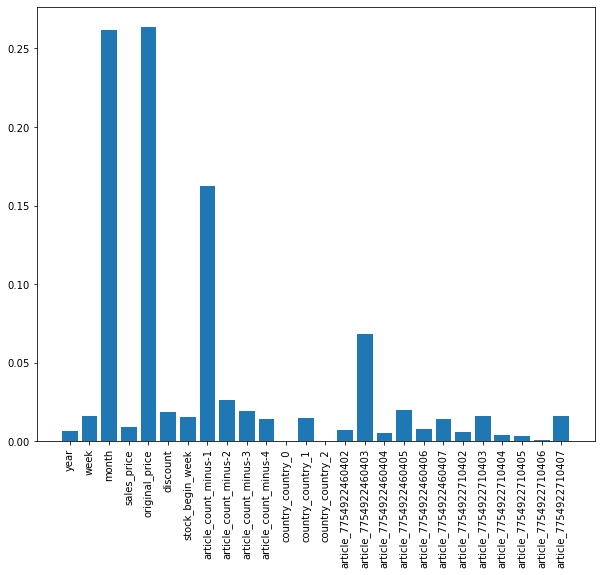

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plt.xticks(rotation=90)
ax.bar(PREDICTORS, model.feature_importances_)
plt.show()

## Restricting the Data to Within October to March

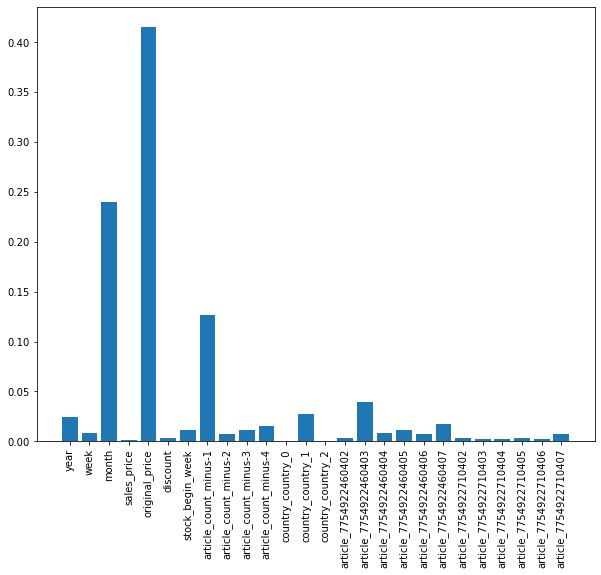

In [27]:
START_DATE = '2019-10-01'
END_DATE = '2020-03-31'

X_prime = df_final[(df_final.transaction_date >= START_DATE) & 
                 (df_final.transaction_date <= END_DATE)][PREDICTORS]
y_prime = df_final[(df_final.transaction_date >= START_DATE) & 
                 (df_final.transaction_date <= END_DATE)][RESPONSE]

model_prime = XGBRegressor()
model_prime.fit(X_prime, y_prime)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plt.xticks(rotation=90)
ax.bar(PREDICTORS, model_prime.feature_importances_)
plt.show()

## Intermediate Conclusion

Not surprisingly, the article or country ids themselves don't really matter. What matters are the `original_price`, `month` and `article_count_minus-1`. Surprisingly, `discount`s are not so important. In my experience, mid-range and premium articles have a high price elasticity. This suggests that these articles are at the low-end range and the brand is probably not that in-demand.     

## Save Lagged Data

In [28]:
df_final.to_csv('lagged_sales_data.csv', index=False)

In [29]:
%watermark --iversions

matplotlib: 3.4.1
numpy     : 1.20.2
ipywidgets: 7.6.3
pandas    : 1.2.4
seaborn   : 0.11.1

